In [1]:
#  Author: -- Rishi Jain --

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
#Import Keras framework for CNN
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Conv2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [4]:
import os
os.chdir('../input/utk-face-cropped/')
os.chdir('utkcropped')
os.chdir('utkcropped')

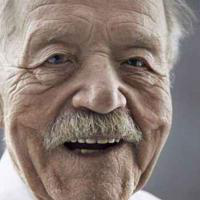

In [5]:
from PIL import Image
im =Image.open('100_0_0_20170112213500903.jpg.chip.jpg')
im

In [6]:
#Since dataset contains some mislabed examples which are not in form of <age>_<gender>_<enthnicity>_<date>
#we remove those examples using fnmatch.
temp = os.listdir()
import fnmatch
dataset = fnmatch.filter(temp, '*_*_*_*')
m = len(dataset)
print(m)

23705


Since the cell contains images of age group in decreasing order, The images are not randomly distributed. We will use Shuffle() so that the distribution is random.

In [7]:
from random import shuffle
shuffle(dataset)

Understanding dataset Each image is of dimension 200 x 200 x 3(RGB) The dataset contains entries like:

* Age       :is a Positive Integer, denoting age of person
* Gender    :is denoted by 1(male) or 0(female)
* Ethnicity :is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others.

In [8]:
#format of labelled images
dataset[:2]

['16_0_0_20170110231732210.jpg.chip.jpg',
 '72_0_0_20170111222416133.jpg.chip.jpg']

In [9]:
age = [i.split('_')[0] for i in dataset]
gender = [i.split('_')[1] for i in dataset]
ethnicity = [i.split('_')[2] for i in dataset]

In [10]:
#top 2 entries in age
age[:2]

['16', '72']

Since ages are returned as string therefore converting them to integers

In [11]:
#Since ages are in strings we need to type cast to integer.
age = list(map(int, age))
gender = list(map(int,gender))
ethnicity = list(map(int,ethnicity))

In [12]:
age[:2]

[16, 72]

Ages are now converted to integers

In [13]:
gender_classes = to_categorical(gender, num_classes=2)
ethnicity_classes = to_categorical(ethnicity,num_classes=5)

Types of Problem:

1. AGE: Regression Problem

2. GENDER: Binary Classification Problem

3. ETHNICITY: Multiclass Classification Problem

In [14]:
#Resizing Images to 128 x 128
from scipy import misc
import cv2
X_data =[]
for file in dataset:
    face = misc.imread(file)
    face = cv2.resize(face, (128, 128) )
    X_data.append(face)
X = np.squeeze(X_data)

In [15]:
#Normalizing Images
X = X.astype('float32')
X /= 255

In [16]:
#Number of Training examples
len(X)

23705

Spliting data into Training Set, Validation Set and Test Set

Train Set Size : 18,000 examples

Validation Set Size : 3,000 examples

Test Set Size : 2,705 examples

In [17]:
(X_gender_train, y_gender_train), (X_gender_test, y_gender_test) = (X[:18000],gender_classes[:18000]) , (X[18000:] , gender_classes[18000:])
(X_gender_valid , y_gender_valid) = (X_gender_test[:3000], y_gender_test[:3000])
(X_gender_test, y_gender_test) = (X_gender_test[3000:], y_gender_test[3000:])

(X_ethnicity_train, y_ethnicity_train), (X_ethnicity_test, y_ethnicity_test) = (X[:18000],ethnicity_classes[:18000]) , (X[18000:] , ethnicity_classes[18000:])
(X_ethnicity_valid , y_ethnicity_valid) = (X_ethnicity_test[:3000], y_ethnicity_test[:3000])
(X_ethnicity_test, y_ethnicity_test) = (X_ethnicity_test[3000:], y_ethnicity_test[3000:])

(X_age_train, y_age_train), (X_age_test, y_age_test) = (X[:18000],age[:18000]) , (X[18000:] , age[18000:])
(X_age_valid , y_age_valid) = (X_age_test[:3000], y_age_test[:3000])
(X_age_test, y_age_test) = (X_age_test[3000:], y_age_test[3000:])

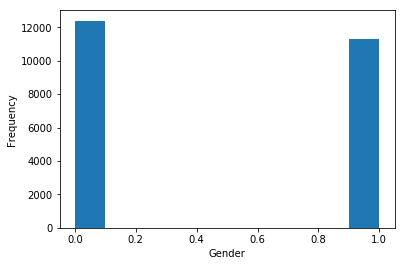

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(gender)
plt.xlabel('Gender')
plt.ylabel('Frequency');

In [19]:
gender_model = Sequential()
gender_model.add(Convolution2D(16, 3, padding='same', activation='relu', input_shape=(128,128, 3)))
gender_model.add(MaxPooling2D(2, 2))
gender_model.add(BatchNormalization())

gender_model.add(Convolution2D(16, 3, padding='same', activation='relu'))
gender_model.add(MaxPooling2D(2, 2))
gender_model.add(BatchNormalization())

gender_model.add(Convolution2D(32, 3, padding='same', activation='relu'))
gender_model.add(MaxPooling2D(2, 2))

gender_model.add(Convolution2D(32, 3,  activation='relu'))
gender_model.add(MaxPooling2D(2, 2))


gender_model.add(Flatten())
gender_model.add(Dropout(0.30))

gender_model.add(Dense(512, activation='relu'))
gender_model.add(Dropout(0.50))

gender_model.add(Dense(128, activation='relu'))
gender_model.add(Dropout(0.50))

gender_model.add(Dense(32, activation='relu'))
gender_model.add(Dropout(0.50))

gender_model.add(Dense(2, activation='sigmoid', name='predictions'))

In [20]:
gender_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        4640      
__________

In [21]:
gender_model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [22]:
gender_history = gender_model.fit(X_gender_train,
         y_gender_train,
         batch_size=3000,
         epochs=30,
         validation_data=(X_gender_valid, y_gender_valid))

Train on 18000 samples, validate on 3000 samples
Epoch 1/30
18000/18000 [==============================] - 13s 714us/step - loss: 0.7503 - acc: 0.5136 - val_loss: 0.6892 - val_acc: 0.6230
Epoch 2/30
18000/18000 [==============================] - 9s 498us/step - loss: 0.6886 - acc: 0.5352 - val_loss: 0.6849 - val_acc: 0.6107
Epoch 3/30
18000/18000 [==============================] - 9s 498us/step - loss: 0.6792 - acc: 0.5698 - val_loss: 0.6564 - val_acc: 0.6523
Epoch 4/30
18000/18000 [==============================] - 9s 497us/step - loss: 0.6469 - acc: 0.6258 - val_loss: 0.5855 - val_acc: 0.7187
Epoch 5/30
18000/18000 [==============================] - 9s 500us/step - loss: 0.5926 - acc: 0.6877 - val_loss: 0.5284 - val_acc: 0.7670
Epoch 6/30
18000/18000 [==============================] - 9s 499us/step - loss: 0.5417 - acc: 0.7401 - val_loss: 0.4783 - val_acc: 0.7915
Epoch 7/30
18000/18000 [==============================] - 9s 499us/step - loss: 0.4957 - acc: 0.7764 - val_loss: 0.4799 - 

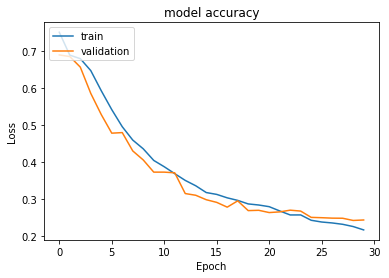

In [32]:
plt.plot(gender_history.history['loss'])
plt.plot(gender_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
from keras.callbacks import ModelCheckpoint
gender_modelcheckpoint = ModelCheckpoint("gender.model")


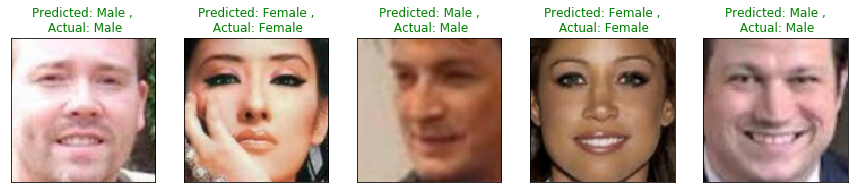

In [25]:
# Plot a random sample of 5 test images, their predicted labels and ground truth
import matplotlib.pyplot as plt
labels = ['Male','Female']
figure = plt.figure(figsize=(15, 15))
y_gender_pred = gender_model.predict(X_gender_test)
for i, index in enumerate(np.random.choice(X_gender_test.shape[0], size=5, replace=False)):
    ax = figure.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_gender_test[index]))
    predict_index = np.argmax(y_gender_pred[index])
    true_index = np.argmax(y_gender_test[index])
    # Set the title for each image
    ax.set_title("Predicted: {} ,\n Actual: {}".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

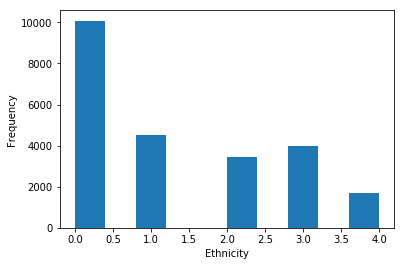

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(ethnicity)
plt.xlabel('Ethnicity')
plt.ylabel('Frequency');

In [27]:
ethnicity_model = Sequential()
ethnicity_model.add(Convolution2D(16, 3, padding='same', activation='relu', input_shape=(128, 128, 3)))
ethnicity_model.add(MaxPooling2D(2, 2))

ethnicity_model.add(Convolution2D(32, 3,padding='same' , activation='relu'))
ethnicity_model.add(MaxPooling2D(2, 2))

ethnicity_model.add(Convolution2D(32, 3,padding='same' , activation='relu'))
ethnicity_model.add(MaxPooling2D(2, 2))

ethnicity_model.add(Convolution2D(64, 3,padding='same' , activation='relu'))
ethnicity_model.add(MaxPooling2D(2, 2))

ethnicity_model.add(Convolution2D(64, 3,padding='same' , activation='relu'))
ethnicity_model.add(MaxPooling2D(2, 2))

ethnicity_model.add(Flatten())
ethnicity_model.add(Dropout(0.30))
ethnicity_model.add(Dense(256, activation='relu'))

ethnicity_model.add(Dropout(0.30))
ethnicity_model.add(Dense(64, activation='relu'))
ethnicity_model.add(Dense(5, activation='softmax'))

In [28]:
ethnicity_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [29]:
ethnicity_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

ethnicity_history = ethnicity_model.fit(X_ethnicity_train,
         y_ethnicity_train,
         batch_size=3000,
         epochs=20,
         validation_data=(X_ethnicity_valid, y_ethnicity_valid))

Train on 18000 samples, validate on 3000 samples
Epoch 1/20
18000/18000 [==============================] - 11s 629us/step - loss: 1.5206 - acc: 0.4024 - val_loss: 1.5028 - val_acc: 0.4343
Epoch 2/20
18000/18000 [==============================] - 9s 481us/step - loss: 1.4695 - acc: 0.4259 - val_loss: 1.4491 - val_acc: 0.4343
Epoch 3/20
18000/18000 [==============================] - 9s 479us/step - loss: 1.4451 - acc: 0.4259 - val_loss: 1.4396 - val_acc: 0.4343
Epoch 4/20
18000/18000 [==============================] - 9s 479us/step - loss: 1.4321 - acc: 0.4259 - val_loss: 1.4181 - val_acc: 0.4343
Epoch 5/20
18000/18000 [==============================] - 9s 480us/step - loss: 1.4091 - acc: 0.4301 - val_loss: 1.3725 - val_acc: 0.4733
Epoch 6/20
18000/18000 [==============================] - 9s 480us/step - loss: 1.3757 - acc: 0.4649 - val_loss: 1.3468 - val_acc: 0.4847
Epoch 7/20
18000/18000 [==============================] - 9s 482us/step - loss: 1.3489 - acc: 0.4777 - val_loss: 1.3195 - 

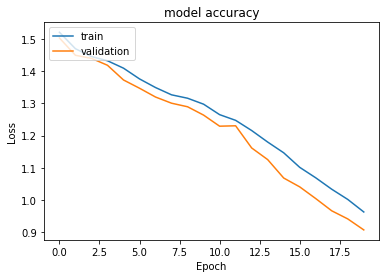

In [31]:
plt.plot(ethnicity_history.history['loss'])
plt.plot(ethnicity_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

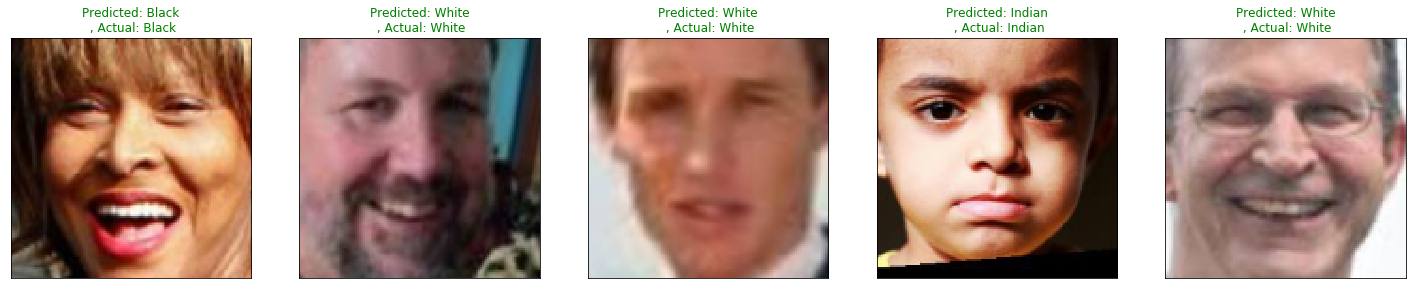

In [49]:
# Plot a random sample of 5 test images, their predicted labels and ground truth
import matplotlib.pyplot as plt
labels = ['White','Black','Asian','Indian','Others']
figure = plt.figure(figsize=(25, 20))
y_ethnicity_pred = ethnicity_model.predict(X_ethnicity_test)
for i, index in enumerate(np.random.choice(X_ethnicity_test.shape[0], size=5, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_ethnicity_test[index]))
    predict_index = np.argmax(y_ethnicity_pred[index])
    true_index = np.argmax(y_ethnicity_test[index])
    # Set the title for each image
    ax.set_title("Predicted: {}\n , Actual: {}".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [34]:
ethnicity_modelcheckpoint = ModelCheckpoint("ethnicity.model")

In [35]:
age_model = Sequential()

age_model.add(Convolution2D(32, 3, padding='same', activation='relu', input_shape=(128, 128, 3)))
age_model.add(MaxPooling2D(2, 2))
age_model.add(BatchNormalization())

age_model.add(Convolution2D(32, 3, padding='same', activation='relu'))
age_model.add(MaxPooling2D(2, 2))

age_model.add(Convolution2D(32, 3, padding='same', activation='relu'))
age_model.add(MaxPooling2D(2, 2))

age_model.add(Flatten())
              
age_model.add(Dropout(0.50))
age_model.add(Dense(512, activation='relu'))
              
age_model.add(Dropout(0.50))
age_model.add(Dense(128, activation='relu'))

age_model.add(Dropout(0.50))
age_model.add(Dense(16, activation='relu'))

age_model.add(Dense(1, activation='linear',name='age_output'))
age_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
__________

In [36]:
age_model.compile(loss='mse',
             optimizer='adam',
             metrics=['mae'])

In [37]:
age_history = age_model.fit(X_age_train,
         y_age_train,
         batch_size=1000,
         epochs=40,
         validation_data=(X_age_valid, y_age_valid))

Train on 18000 samples, validate on 3000 samples
Epoch 1/40
18000/18000 [==============================] - 12s 646us/step - loss: 611.9118 - mean_absolute_error: 19.1882 - val_loss: 390.7556 - val_mean_absolute_error: 15.6987
Epoch 2/40
18000/18000 [==============================] - 10s 541us/step - loss: 402.1991 - mean_absolute_error: 15.5297 - val_loss: 338.0479 - val_mean_absolute_error: 13.5689
Epoch 3/40
18000/18000 [==============================] - 10s 546us/step - loss: 330.7865 - mean_absolute_error: 13.9831 - val_loss: 295.8715 - val_mean_absolute_error: 12.5742
Epoch 4/40
18000/18000 [==============================] - 10s 541us/step - loss: 271.8352 - mean_absolute_error: 12.5688 - val_loss: 205.8649 - val_mean_absolute_error: 10.9136
Epoch 5/40
18000/18000 [==============================] - 10s 541us/step - loss: 231.9451 - mean_absolute_error: 11.6364 - val_loss: 319.9729 - val_mean_absolute_error: 13.5222
Epoch 6/40
18000/18000 [==============================] - 10s 539u

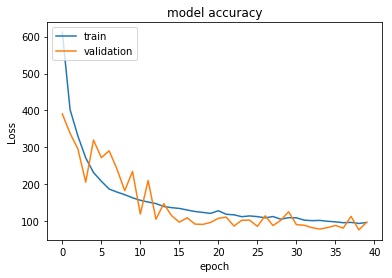

In [41]:
plt.plot(age_history.history['loss'])
plt.plot(age_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

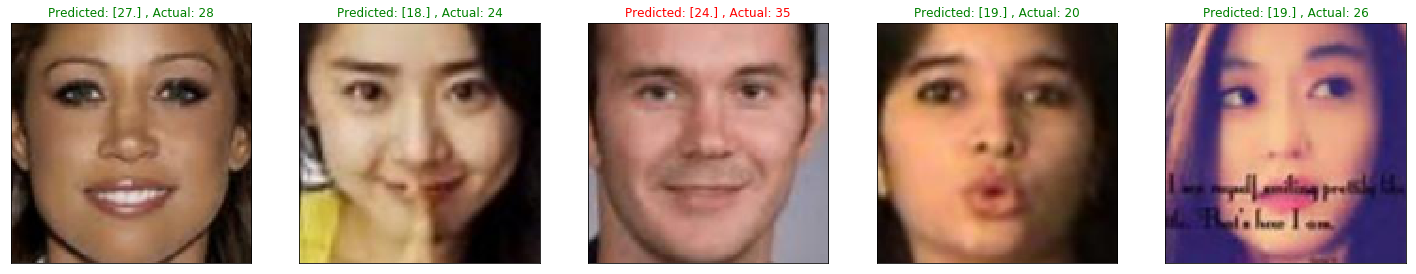

In [44]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(25, 20))
y_age_pred = age_model.predict(X_age_test)
for i, index in enumerate(np.random.choice(X_age_test.shape[0], size=5, replace=False)):
    ax = figure.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_age_test[index]))
    # Set the title for each image
    ax.set_title("Predicted: {} , Actual: {}".format(np.rint(y_age_pred[index]), 
                                  y_age_test[index]),
                                  color=("green" if abs(y_age_pred[index] - y_age_test[index])<=7  else "red"))
plt.show()

In [40]:
age_modelcheckpoint = ModelCheckpoint("age.model")